In [1]:
import numpy as np
import statistics as stats
import os
import pandas as pd
from PIL import Image
from math import pi, tan
import cv2

In [2]:
PARENT_DIR = '/media/johnkoo/data/stanford-dogs-dataset'

IMAGE_SHAPE = (128, 128)

INIT_FOV_DEG = 70
NEW_ANGLE_DEG = 30
INIT_FOV = INIT_FOV_DEG * pi / 180
NEW_ANGLE = NEW_ANGLE_DEG * pi / 180
RATIO =  tan(NEW_ANGLE / 2) / tan(INIT_FOV / 2)
RATIO

0.3826711050786672

In [3]:
def crop_image(image, ratio, centroid_1, centroid_2, output_size=IMAGE_SHAPE):
    image = np.array(image)
    upper = int(centroid_1 * (1 - RATIO))
    left = int(centroid_2 * (1 - RATIO))
    lower = int(image.shape[0] * RATIO + centroid_1 * (1 - RATIO))
    right = int(image.shape[1] * RATIO + centroid_2 * (1 - RATIO))
    cropped_image = cv2.resize(image[upper:lower, left:right, :], 
                               dsize=output_size)
    return cropped_image

In [4]:
os.chdir(PARENT_DIR)
meta_df = pd.read_csv('meta.csv')
meta_df

,Unnamed: 0,label,filename,centroid_1,centroid_2,coverage,dataset
0,0,n02099712-Labrador_retriever,n02099712_5263.jpg,237.0,275.5,0.663354,train
1,1,n02099712-Labrador_retriever,n02099712_7802.jpg,243.5,123.5,0.343824,train
2,2,n02099712-Labrador_retriever,n02099712_6318.jpg,245.5,322.0,0.485216,train
3,3,n02099712-Labrador_retriever,n02099712_5648.jpg,187.5,231.0,0.915093,train
4,4,n02099712-Labrador_retriever,n02099712_6901.jpg,226.5,230.5,0.193892,train
5,5,n02099712-Labrador_retriever,n02099712_365.jpg,215.5,285.5,0.217765,train
6,6,n02099712-Labrador_retriever,n02099712_1200.jpg,324.0,181.0,0.204947,train
7,7,n02099712-Labrador_retriever,n02099712_2501.jpg,202.5,241.5,0.929287,train
8,8,n02099712-Labrador_retriever,n02099712_7533.jpg,211.5,203.0,0.149525,train
9,9,n02099712-Labrador_retriever,n02099712_4965.jpg,154.5,217.0,0.803030,train


In [5]:
train_df = meta_df[meta_df.dataset == 'train']
train_df

,Unnamed: 0,label,filename,centroid_1,centroid_2,coverage,dataset
0,0,n02099712-Labrador_retriever,n02099712_5263.jpg,237.0,275.5,0.663354,train
1,1,n02099712-Labrador_retriever,n02099712_7802.jpg,243.5,123.5,0.343824,train
2,2,n02099712-Labrador_retriever,n02099712_6318.jpg,245.5,322.0,0.485216,train
3,3,n02099712-Labrador_retriever,n02099712_5648.jpg,187.5,231.0,0.915093,train
4,4,n02099712-Labrador_retriever,n02099712_6901.jpg,226.5,230.5,0.193892,train
5,5,n02099712-Labrador_retriever,n02099712_365.jpg,215.5,285.5,0.217765,train
6,6,n02099712-Labrador_retriever,n02099712_1200.jpg,324.0,181.0,0.204947,train
7,7,n02099712-Labrador_retriever,n02099712_2501.jpg,202.5,241.5,0.929287,train
8,8,n02099712-Labrador_retriever,n02099712_7533.jpg,211.5,203.0,0.149525,train
9,9,n02099712-Labrador_retriever,n02099712_4965.jpg,154.5,217.0,0.803030,train


In [6]:
dogs = np.unique(train_df.label)

In [7]:
os.chdir(PARENT_DIR)
os.chdir('Images')

low_coverage_images = []
low_coverage_labels = []
high_coverage_images = []
high_coverage_labels = []

for dog in dogs:
    dog_df = train_df[train_df.label == dog]
    median_coverage = stats.median(dog_df.coverage)
    
    os.chdir(dog)
    
    for i, file in enumerate(dog_df.filename):
        image = Image.open(file)
        cropped_image = crop_image(image, RATIO, dog_df.centroid_1.iloc[i], dog_df.centroid_2.iloc[i])
        cropped_image = cropped_image[:, :, 0:3]
        
        if dog_df.coverage.iloc[i] > median_coverage:
            high_coverage_images.append(cropped_image)
            high_coverage_labels.append(dog)
        else:
            low_coverage_images.append(cropped_image)
            low_coverage_labels.append(dog)
    
    os.chdir('..')

In [8]:
print(len(low_coverage_images))
print(len(low_coverage_labels))
print(len(high_coverage_images))
print(len(high_coverage_labels))

6000
6000
6000
6000


In [9]:
high_coverage_images = np.stack(high_coverage_images)
high_coverage_labels = np.array(high_coverage_labels)
low_coverage_images = np.stack(low_coverage_images)
low_coverage_labels = np.array(low_coverage_labels)

In [10]:
os.chdir(PARENT_DIR)
if str('train') not in os.listdir():
    os.mkdir('train')
os.chdir('train')
if str(NEW_ANGLE_DEG) not in os.listdir():
    os.mkdir(str(NEW_ANGLE_DEG))
os.chdir(str(NEW_ANGLE_DEG))
np.save('./low-coverage-images.npy', low_coverage_images)
np.save('./low-coverage-labels.npy', low_coverage_labels)
np.save('./high-coverage-images.npy', high_coverage_images)
np.save('./high-coverage-labels.npy', high_coverage_labels)

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

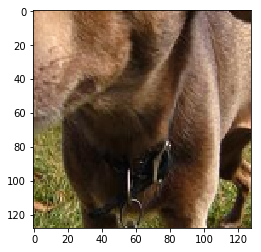

In [12]:
plt.imshow(high_coverage_images[0])

In [13]:
high_coverage_images.shape

(6000, 128, 128, 3)